In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.datasets import cifar10 #(50000, 32X32)

### 1. Pré-processamento dos Dados

- **Carregamento:** Utilização do dataset CIFAR-10 via Keras.
- **Normalização:** Conversão dos pixels para o intervalo [0, 1].
- **To_categorical:** Conversão dos rótulos para o formato categórico.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
n_classes = 10

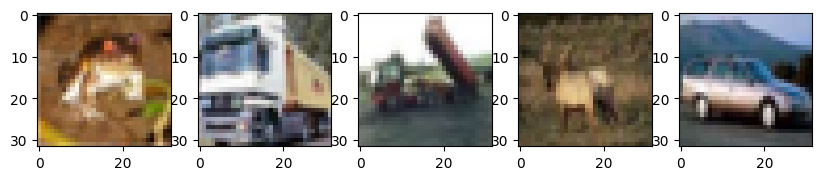

In [4]:
fig = plt.figure()
for i in range(5):
    a = fig.add_subplot(1, 5, i + 1)
    img_num = np.random.randint(x_train.shape[0])
    image = x_train[i]
    id = y_train[i]
    plt.imshow(image)
fig.set_size_inches(10,10)
plt.show()

In [5]:
# Encoding
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### 2. Construção do Modelo

A arquitetura da CNN utilizada é composta por:

- **Camadas Convolucionais (Conv2D):** Extraem características espaciais das imagens.
- **Camadas de Pooling (MaxPooling2D):** Reduzem a dimensionalidade espacial.
- **Camada Flatten:** Achata a saída para um vetor 1D.
- **Camada Densa (Dense):** Realiza a classificação final.
- **Dropout:** Ajuda a evitar overfitting.

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'), 
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

c:\Users\99837631\Anaconda3\envs\mba-deep-learning\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



### 3. Compilação

- **Otimizador:** Adam (`learning_rate=0.001`)
- **Função de perda:** Categorical Crossentropy
- **Métrica:** Acurácia

In [7]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 4. Treinamento

- **Épocas:** 20
- **Batch size:** 128
- **Validação:** Utiliza o conjunto de teste para validação durante o treinamento

In [8]:
model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.2934 - loss: 1.8967 - val_accuracy: 0.5282 - val_loss: 1.3091
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.5133 - loss: 1.3626 - val_accuracy: 0.6128 - val_loss: 1.0779
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 83ms/step - accuracy: 0.6071 - loss: 1.1185 - val_accuracy: 0.6708 - val_loss: 0.9365
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.6705 - loss: 0.9603 - val_accuracy: 0.6940 - val_loss: 0.8745
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.7100 - loss: 0.8413 - val_accuracy: 0.7219 - val_loss: 0.8071
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.7512 - loss: 0.7299 - val_accuracy: 0.7300 - val_loss: 0.7774
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 91ms/step - accuracy: 0.7771 - loss: 0.6515 - val_accuracy: 0.7470 - val_loss: 0.7390
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.8052 - loss: 0.5660 

### 5. Avaliação

Após o treinamento, o modelo é avaliado no conjunto de teste para medir a acurácia final.

In [9]:
# Avaliar o modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Acurácia no teste: {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7676 - loss: 1.2037
Acurácia no teste: 76.41%


### 6. Conclusão

Com a arquitetura proposta, foi possível atingir uma acurácia de aproximadamente 76,41% no conjunto de teste.

### 7. Testes com as Imagens

Com o modelo pronto, comparamos os labels da algumas imagem com o previsto pelo modelo.

In [18]:
# Carregar nomes das classes do CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


# Se y_test estiver em one-hot, converta para rótulo simples
if y_test.shape[-1] == 10:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


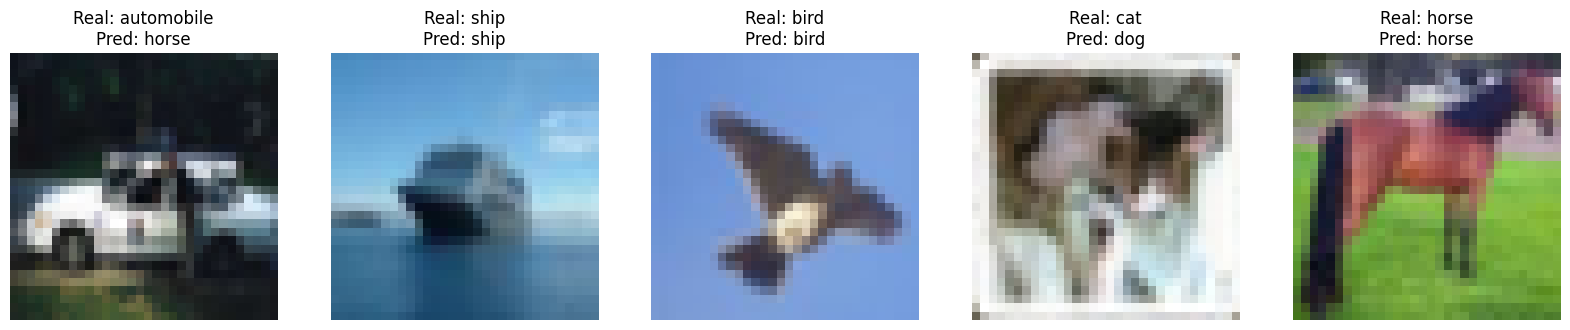

In [19]:
# Fazer predições
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Mostrar 5 imagens aleatórias do conjunto de teste
num_images = 5
indices = np.random.choice(len(x_test), num_images, replace=False)
plt.figure(figsize=(20, 8))
for i, idx in enumerate(indices):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[idx])
    plt.axis('off')
    plt.title(f"Real: {class_names[y_test_labels[idx]]}\nPred: {class_names[y_pred_labels[idx]]}")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


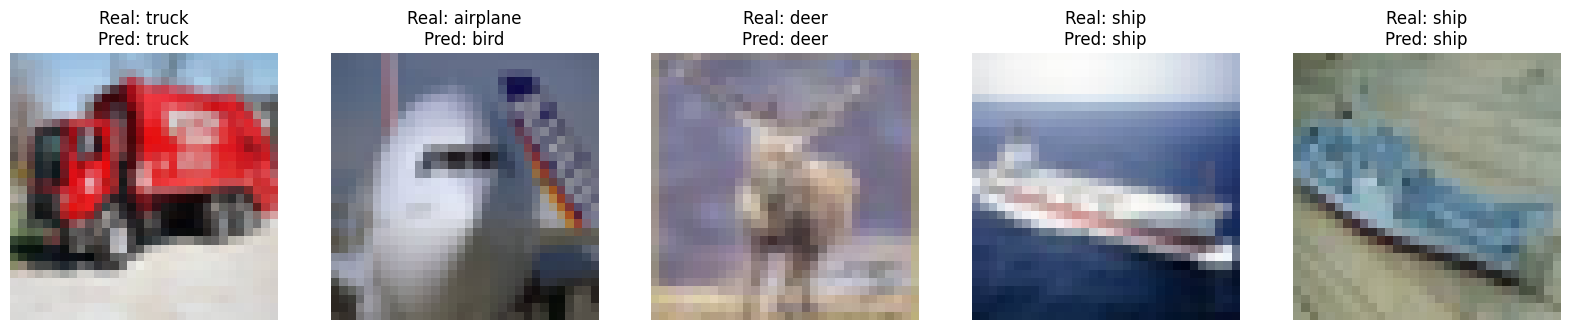

In [20]:
# Fazer predições
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Mostrar 5 imagens aleatórias do conjunto de teste
num_images = 5
indices = np.random.choice(len(x_test), num_images, replace=False)
plt.figure(figsize=(20, 8))
for i, idx in enumerate(indices):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[idx])
    plt.axis('off')
    plt.title(f"Real: {class_names[y_test_labels[idx]]}\nPred: {class_names[y_pred_labels[idx]]}")
plt.show()